# 0. import 모음

In [1]:
import pandas as pd
import numpy as np
import os

- 데이터 위치로 이동

In [2]:
%cd '/prj/nowage/_git/kcse/Emotion-recognition/data2'

/prj/nowage/_git/kcse/Emotion-recognition/data2


# 2. file list 가져오기

In [8]:

path_dir = './'
file_list = os.listdir(path_dir)


In [9]:
print(len(file_list))

46


# 3. 데이터셋 만들기

## 파일 불러옴

In [10]:
em_x = []
em_y = []
for i in file_list :
  tempstr = './'+i
  em_x.append(np.array(pd.read_csv(tempstr)))
  #파일을 불러오면서 맨 앞 글자를 가져와 y 로 씀
  em_y.append(i[0])

In [11]:
print(em_x)

[array([[0.2279, 0.0102, 0.3302, ..., 0.341 , 0.0018, 0.0472],
       [0.2961, 0.0049, 0.4812, ..., 0.1602, 0.0007, 0.0236],
       [0.1052, 0.0014, 0.4774, ..., 0.1794, 0.0082, 0.0924],
       ...,
       [0.4072, 0.0159, 0.1199, ..., 0.1858, 0.0033, 0.2666],
       [0.4488, 0.0207, 0.0991, ..., 0.1548, 0.004 , 0.2707],
       [0.3364, 0.0125, 0.187 , ..., 0.217 , 0.0046, 0.2401]]), array([[1.572e-01, 0.000e+00, 5.400e-03, ..., 4.020e-02, 4.000e-03,
        1.148e-01],
       [5.930e-02, 0.000e+00, 2.900e-03, ..., 1.690e-02, 2.500e-03,
        3.370e-02],
       [7.110e-02, 0.000e+00, 4.600e-03, ..., 2.700e-02, 3.900e-03,
        5.490e-02],
       ...,
       [7.730e-02, 4.300e-03, 2.270e-02, ..., 5.540e-02, 2.300e-03,
        8.355e-01],
       [1.102e-01, 7.300e-03, 1.580e-02, ..., 9.740e-02, 7.000e-04,
        7.678e-01],
       [9.100e-02, 3.300e-03, 1.330e-02, ..., 7.130e-02, 6.000e-04,
        8.196e-01]]), array([[5.752e-01, 3.000e-04, 7.700e-03, ..., 6.070e-02, 3.400e-03,
   

- y 값 확인

In [12]:
print(em_y)

['b', 'a', 'a', 'b', 'a', 'b', 'a', 'a', 'c', 'c', 'c', 'c', 'a', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c', 'a', 'b', 'c', 'b', 'c', 'c', 'c', 'a', 'b', 'a', 'b', 'c', 'a', 'a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'c', 'c', 'a', 'a']


- 파일 갯수 확인

In [13]:
print(len(em_x))

46


In [14]:
# 데이터를 다시 불러와야 하거나 로우데이터로 뭔가 확인을 해야할 수 있으므로 em_x 는 그대로 두고 em_x2 생성
# 하는 김에 np.array로 해서 shape 도 봄.
em_x2 = np.array(em_x)
em_x2[0].shape

/prj/nowage/.virtualenvs/test/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


(335, 7)

## y 값 인코딩

In [15]:
# 불러온 파일 갯수와 같은지 한번 체크
print(len(em_y))

46


In [16]:
reshape_ha = list(em_y)
new_list = []
for v in reshape_ha:
    if v not in new_list:
        new_list.append(v)
print(new_list)

['b', 'a', 'c']


In [17]:
reshape_ha
lst_set=new_list
enc={v:k for k,v in enumerate(lst_set)}
dec={k:v for k,v in enumerate(reshape_ha)}

In [18]:
print(enc)

{'b': 0, 'a': 1, 'c': 2}


In [19]:
# 위에 확인된 enc 가 a, b, c 순서가 아닌 경우 실행하여 순서를 맞춰줌.
# dec 도 세팅해야할텐데..
enc = {'a': 0, 'b': 1, 'c': 2}

- 인코딩 잘 됐는지 확인

In [20]:
lst_e = [enc[i] for i in reshape_ha]
lst_e

[1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 0]

- em_x 와 마찬가지로 em_y 보존을 위해 em_y2 생성

In [21]:
em_y2 = lst_e

# EDA

In [22]:
len(em_x[0])

335

# 학습형태로 만들어주기
- 100개 씩 끊어서 LSTM 에서 학습할 수 있게 만들어 줌.
- npx 에 y 값을 붙여줌.(셔플링을 위해)

In [23]:
# 앞에서 끊어주기
# for 문을 통해 frames 단위로 학습을 하는 부분임.
npx = []
npy = []
frames = 100
for fileidx in range(0,len(em_x2)):
  # 파일당 최대 갯수를 지정
  # endpoint = int (em_x2[fileidx].shape[0]) 
  endpoint = 150
  print("file======",fileidx ,endpoint,"=========") # 파일 어디까지 됐나 확인 용도
  for i in range(0,endpoint,1):
    # 1 개씩 하는 것이 시간이 오래 걸리는 관계로 100단위로 쪼개서 하기 위해 인덱스 지정
    idx = (i+frames) # i ~ idx 까지 잡아줌.
    idx2 = (idx+1)
    #print(fileidx, i, idx2)
    if idx2 >= endpoint :
      break;
    else:
      #e = np.concatenate((c, d), axis = 0)
      #e = np.concatenate((c, d), axis = 0)
      #print("append")
      npx.append(np.array(em_x2[fileidx][i:idx]))
      npy.append(np.array(em_y2[fileidx]))
npx = np.array(npx)
npy = np.array(npy)
print(npx.shape, npy.shape)

file====== 0 150 =========
file====== 1 150 =========
file====== 2 150 =========
file====== 3 150 =========
file====== 4 150 =========
file====== 5 150 =========
file====== 6 150 =========
file====== 7 150 =========
file====== 8 150 =========
file====== 9 150 =========
file====== 10 150 =========
file====== 11 150 =========
file====== 12 150 =========
file====== 13 150 =========
file====== 14 150 =========
file====== 15 150 =========
file====== 16 150 =========
file====== 17 150 =========
file====== 18 150 =========
file====== 19 150 =========
file====== 20 150 =========
file====== 21 150 =========
file====== 22 150 =========
file====== 23 150 =========
file====== 24 150 =========
file====== 25 150 =========
file====== 26 150 =========
file====== 27 150 =========
file====== 28 150 =========
file====== 29 150 =========
file====== 30 150 =========
file====== 31 150 =========
file====== 32 150 =========
file====== 33 150 =========
file====== 34 150 =========
file====== 35 150 =========
fi

In [24]:
# # 뒤에서 끊어주기
# # for 문을 통해 frames 단위로 학습을 하는 부분임.
# npx = []
# npy = []
# frames = 100
# for fileidx in range(0,len(em_x2)):
#   # 파일당 최대 갯수를 지정
#   # endpoint = int (em_x2[fileidx].shape[0]) 
#   endpoint = 50
#   print(fileidx ,endpoint) # 파일 어디까지 됐나 확인 용도
#   for i in range(1,endpoint,1):
#     i = (i +frames)* -1
#     idx = i+100
#     print(i," 부터 ", idx)
#     npx.append(np.array(em_x2[fileidx][i:idx]))
#     npy.append(np.array(em_y2[fileidx]))
# npx = np.array(npx)
# npy = np.array(npy)
# print(npx.shape, npy.shape)

In [25]:
npx

array([[[0.2279, 0.0102, 0.3302, ..., 0.341 , 0.0018, 0.0472],
        [0.2961, 0.0049, 0.4812, ..., 0.1602, 0.0007, 0.0236],
        [0.1052, 0.0014, 0.4774, ..., 0.1794, 0.0082, 0.0924],
        ...,
        [0.4002, 0.0064, 0.0863, ..., 0.2389, 0.0014, 0.2562],
        [0.5607, 0.0136, 0.0857, ..., 0.157 , 0.0042, 0.1662],
        [0.5072, 0.0126, 0.0959, ..., 0.192 , 0.0039, 0.1729]],

       [[0.2961, 0.0049, 0.4812, ..., 0.1602, 0.0007, 0.0236],
        [0.1052, 0.0014, 0.4774, ..., 0.1794, 0.0082, 0.0924],
        [0.1915, 0.0019, 0.3885, ..., 0.1261, 0.0036, 0.0872],
        ...,
        [0.5607, 0.0136, 0.0857, ..., 0.157 , 0.0042, 0.1662],
        [0.5072, 0.0126, 0.0959, ..., 0.192 , 0.0039, 0.1729],
        [0.2068, 0.0044, 0.1092, ..., 0.2755, 0.0014, 0.3919]],

       [[0.1052, 0.0014, 0.4774, ..., 0.1794, 0.0082, 0.0924],
        [0.1915, 0.0019, 0.3885, ..., 0.1261, 0.0036, 0.0872],
        [0.1325, 0.0024, 0.385 , ..., 0.0613, 0.0163, 0.1175],
        ...,
        [0.5

In [26]:
npx.shape

(2254, 100, 7)

In [27]:
npy

array([1, 1, 1, ..., 0, 0, 0])

## y 값 원핫 인코딩

In [28]:
ohe=np.eye( len(enc.keys() ))
ohe

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

- 원핫 인코딩 결과 확인

In [29]:
temp_elst = [ohe[i] for i in npy]
temp_elst

[array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0., 1., 0.]),
 array([0.

In [30]:
npy = np.array(temp_elst)

In [31]:
npy.shape

(2254, 3)

In [32]:
pdy = pd.DataFrame(npy)
pdy.value_counts()

0    1    2  
1.0  0.0  0.0    784
0.0  1.0  0.0    735
     0.0  1.0    735
dtype: int64

## 셔플링

In [33]:
# shuffle = True

from sklearn.model_selection import train_test_split



#출처: https://rfriend.tistory.com/519 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

X_train, X_test, y_train, y_test = train_test_split(npx, 

                                                    npy, 

                                                    test_size=0.3, 

                                                    shuffle=True, 

                                                    random_state=1004)

In [34]:
print (len(X_train),len(X_test),len(y_train),len(y_test))

1577 677 1577 677


In [35]:
y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

# 4. LSTM 모델 만들기

In [36]:
from tensorflow import keras
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping


In [37]:
em_x2[0].shape[1]

7

## 모델 구성
- 들어오는 데이터의 약 2배 이상의 히든레이어 생성
- y 값에 맞춰 3 개를 softmax 형태로 아웃풋 지정

In [40]:

K.clear_session()
model = Sequential() # Sequeatial Model 
model.add(LSTM(200, input_shape=( frames,  em_x2[0].shape[1]),activation='sigmoid')) # (timestep, feature) 
model.add(Dense(3,activation='softmax')) # output = 1
# admax = keras.optimizers.Adamax(learning_rate=0.12, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
# model.compile(optimizer=admax, loss='mse')
adamax = keras.optimizers.Adamax(learning_rate=0.012, beta_1=0.95, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='mse', optimizer=adamax)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               166400    
_________________________________________________________________
dense (Dense)                (None, 3)                 603       
Total params: 167,003
Trainable params: 167,003
Non-trainable params: 0
_________________________________________________________________


In [41]:
# X_train, X_test, y_train, y_test
history = model.fit(X_train, y_train, batch_size=30, epochs=180, verbose=1, validation_data=(X_test, y_test))

Epoch 1/180
53/53 [==============================] - 4s 59ms/step - loss: 0.3294 - val_loss: 0.2782
Epoch 2/180
53/53 [==============================] - 3s 55ms/step - loss: 0.2754 - val_loss: 0.2801
Epoch 3/180
53/53 [==============================] - 3s 55ms/step - loss: 0.2720 - val_loss: 0.2762
Epoch 4/180
53/53 [==============================] - 3s 55ms/step - loss: 0.2413 - val_loss: 0.2230
Epoch 5/180
53/53 [==============================] - 3s 56ms/step - loss: 0.2202 - val_loss: 0.2172
Epoch 6/180
53/53 [==============================] - 3s 56ms/step - loss: 0.2182 - val_loss: 0.2145
Epoch 7/180
53/53 [==============================] - 3s 55ms/step - loss: 0.2155 - val_loss: 0.2122
Epoch 8/180
53/53 [==============================] - 3s 55ms/step - loss: 0.2114 - val_loss: 0.2041
Epoch 9/180
53/53 [==============================] - 3s 56ms/step - loss: 0.2082 - val_loss: 0.2021
Epoch 10/180
53/53 [==============================] - 3s 54ms/step - loss: 0.2028 - val_loss: 0.1923

In [42]:
model.save('/prj/nowage/_git/kcse/Emotion-recognition/models/emo.h5')

# 평가

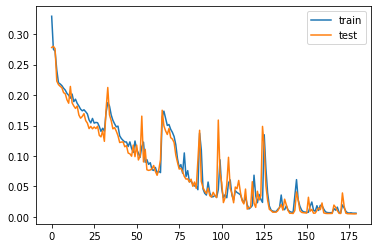

In [43]:
# plot history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [44]:
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
# # fit network
# history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

In [45]:
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
def PrintRegScore(y_true, y_pred):
    print('explained_variance_score: {}'.format(explained_variance_score(y_true, y_pred)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_true, y_pred)))
    print('r2_score: {}'.format(r2_score(y_true, y_pred)))
# npx = np.array([divine_x[i][0:100]])
# npy = np.array([divine_y[i][101]])
# X_train, X_test, y_train, y_test
y_true = np.array(y_test)
x_scaled = np.array(X_test)
y_pred = model.predict(x_scaled)
PrintRegScore(y_true, y_pred)

explained_variance_score: 0.9771607170791535
mean_squared_errors: 0.005115414382904761
r2_score: 0.9771296348919466


In [46]:
y_pred2 = np.argmax(y_pred, axis=1)
y_pred2

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1,
       1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1,
       2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1,
       0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0,
       0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1,
       0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,

In [47]:
len(y_true)

677

In [48]:
y_true2 = np.argmax(y_true, axis=1)
y_true2

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1,
       1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1,
       2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1,
       0, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0,
       0, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1,
       0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,

In [49]:
a = pd.DataFrame(y_true2)
a[a[0]==2].count

<bound method DataFrame.count of      0
9    2
13   2
16   2
17   2
19   2
..  ..
665  2
668  2
671  2
672  2
675  2

[219 rows x 1 columns]>

In [50]:
y_pred2.shape

(677,)

In [51]:
y_true2.shape

(677,)

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

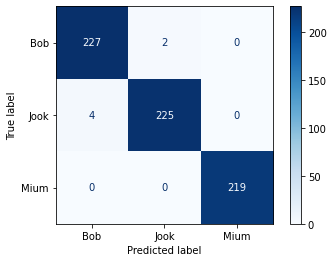

In [53]:
labels = ["Bob", "Jook", "Mium"]

cm = confusion_matrix(y_true2, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [55]:
metric = keras.metrics.BinaryAccuracy()
acc = metric(y_true2, y_pred2)
print(acc)

tf.Tensor(0.6676514, shape=(), dtype=float32)


In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = y_true2	# 실제 labels
guesses = y_pred2	# 에측된 결과

print(accuracy_score(labels, guesses))	# 0.3
#print(recall_score(labels, guesses))	# 0.42
#print(precision_score(labels, guesses))	# 0.5
#print(f1_score(labels, guesses))	# 0.46

0.9911373707533235


In [57]:
# y_pred

In [58]:
# CATEGORIES = ["BOB", "JUK", "MIUM"]

In [59]:
# pred_names = []
# for i in y_pred :
#   pred_names.append(CATEGORIES[np.argmax(i)])
# print(pred_names)

In [60]:
# dap = []
# for i in y_pred :
#   temp = 0
#   tempnum = 0
#   for d in range(0,3):
#     if temp < i[d] :
#       temp = i[d]
#       tempnum = d
#   dap.append(tempnum)

In [61]:
# print(dap)

In [62]:
# ttx = [[1 ,0, 1, 0, 0, 0, 1],
#  [1 ,0, 0, 0, 0, 0, 1],
#  [1 ,0, 0, 0, 0, 0, 1],
#  [1 ,0, 0, 0, 0, 0, 1],
#  [0 ,0, 0, 0, 0, 0, 1],
#  [1 ,0, 0, 1, 0, 0, 0],
#  [1 ,0, 0, 0, 0, 0, 1],
#  [1 ,0, 0, 0, 0, 1, 1],
#  [1 ,0, 0, 0, 0, 0, 1],
#  [1 ,0, 1, 0, 0, 0, 0]]
# tty = [1. ,0., 0.]

In [63]:
# y_pred = model.predict([ttx])

In [64]:
# y_pred

In [65]:
# CATEGORIES[np.argmax(tty)]

In [66]:
# CATEGORIES[np.argmax(y_pred)]